In [2]:
import collections

import matplotlib.pyplot as plt
import shapely.geometry as geom
import shapely.affinity as aff

In [12]:
def recursiveRound(iter, digits):
    if isinstance(iter, collections.Iterable) == False:
        try: # if it is a number, round it
            return round(iter, digits)
        except:
            return iter
    else: # assign child objects (iter) to current object
        for index, value in enumerate(iter):
            recursed = recursiveRound(value, digits)
            try: # when iter isn't a tuple
                iter[index] = recursed
            except(TypeError):
                iterCopy = list(iter)
                iterCopy[index] = recursed
                iter = tuple(iterCopy)
        return iter

print(recursiveRound([(0.292, 0.21722014), [(118.2194, 0.10282)]], 2))

[(0.29, 0.22), [(118.22, 0.1)]]


In [4]:
def plotCoords(coords):
    x,y = zip(*list(coords))
    plt.plot(x,y)

def plotPoints(points):
    x,y = zip(*list(points))
    plt.scatter(x, y)

def plotPolys(polys):
    for poly in polys:
        if not getattr(poly, "exterior", None):
            print("got line?")

        plotCoords(poly.exterior.coords)

        for hole in poly.interiors:
            plotCoords(hole.coords)

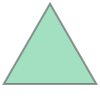

In [17]:
def makePoly(sides, radius):
    line = geom.LineString([(0, 0), (0, radius)])
    vertices = []

    if sides % 2 == 0:
        line = aff.rotate(line, -360 / sides)

    for i in range(0, sides):
        line = geom.LineString(recursiveRound([*line.coords], 2))
        vertices.append(line.coords[1])
        line = aff.rotate(line, -360 / sides, origin=(0,0))
    return geom.Polygon(vertices)

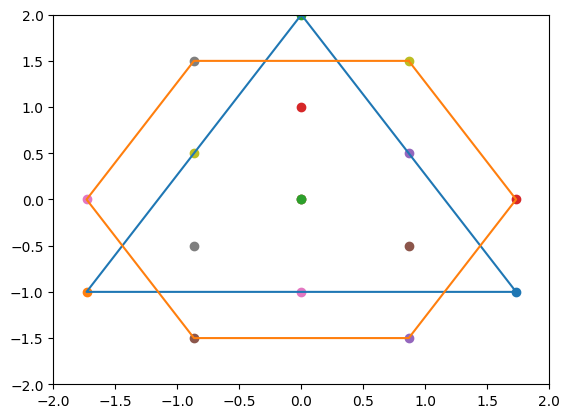

In [ ]:
a = makePoly(3, 2)
b = makePoly(6, 2)

plt.axis([-2, 2, -2, 2])
plotPolys([a, b])